In [18]:
import pandas as pd
import numpy as np
from numpy import genfromtxt, savetxt
from numpy.linalg import norm

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

import math

from schnetpack.datasets import QM9

import random

from pylab import *
import matplotlib.pyplot as plt
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage


In [32]:
class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=0, offset = 0 ):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)        
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                     [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l,image]


class distance_networks:
    def __init__(self,emb,label,value):
        self.emb = emb
        self.value = value
        self.label = label

        
        #calculate differences between target and embedding
        euc_dist = distance_networks.calculate_distances(self)
        #expand distances on 2D map
        network_data, bin_count, bin_cumul_count, bin_number = distance_networks.data_to_network(self,euc_dist)
        #plot network
        distance_networks.plot_network(self,network_data,bin_count,bin_cumul_count,bin_number)
        #print closest vectors
        distance_networks.closest_vectors(self,network_data)
        #distane_networks
        distance_networks.Distance_Network(self,euc_dist)
    
    def calculate_distances(self):
        target = emb[value]
        euc_dist = np.zeros((len(emb)))
        for i in range(len(emb)):
            vec = emb[i]
            euc_dist[i] = norm(target - vec)
        return euc_dist

    
    def data_to_network(self,euc_dist):
        network_data = np.zeros((len(euc_dist),2))
        for i in range(len(euc_dist)):
            network_data[i][0] = euc_dist[i]
            network_data[i][1] = math.cos(i)
        
        bin_increment = 0.1
        bin_number = 200
        bin_count = np.zeros((25,bin_number))
        bin_cumul_count = np.zeros((bin_number))
        
        for i in range(len(euc_dist)):
            k = label['Target'][i]
            bin_position = 0.0
            for j in range(bin_number):
                if bin_position <= euc_dist[i] < (bin_position + bin_increment):
                    bin_count[k][j] = bin_count[k][j] + 1
                bin_position = bin_position + bin_increment
            

        for i in range(len(euc_dist)):
            bin_position = 0.0
            for j in range(bin_number):
                if bin_position <= euc_dist[i] < (bin_position + bin_increment):
                    bin_cumul_count[j] = bin_cumul_count[j] + 1
                bin_position = bin_position + bin_increment   
            
        return network_data, bin_count, bin_cumul_count, bin_number
            
    
    def plot_network(self,network_data,bin_count,bin_cumul_count,bin_number):
        
        
        color=['none','none','tomato','none','mediumaquamarine',
               'mediumseagreen','palegreen','none','lightblue','none',
                'lightskyblue','none','cornflowerblue','khaki','NONE',
                'none','lightpink','mistyrose','deeppink','hotpink',
                'mediumvioletred','plum','purple','NONE','mediumorchid']


        fig1, ax1 = plt.subplots(figsize=(8,10),dpi=1000,nrows=2,ncols=1)
        ax1[0].set_xlabel('30D Distance')
        ax1[0].scatter(network_data[:,0],network_data[:,1],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
        
        print(bin_count)
        x=np.linspace(0,20,bin_number)
        ax1[1].set_xlabel('30D Distance')
        ax1[1].set_ylabel('Populaion')
        ax1[1].set_ylim([0,200])
        for i in range(25):
            ax1[1].plot(x,bin_count[i,:],color=color[i])
    
        line1,  = plt.plot(0,0, color='tomato', lw=10)
        line2,  = plt.plot(0,0, color='mediumaquamarine', lw=10)  
        line3, = plt.plot(0,0, color='mediumseagreen', lw=10)  
        line4, = plt.plot(0,0, color='palegreen', lw=10)  
        line5, = plt.plot(0,0, color='lightblue', lw=10)  
        line6, = plt.plot(0,0, color='lightskyblue', lw=10)  
        line7, = plt.plot(0,0, color='cornflowerblue', lw=10)  
        line8, = plt.plot(0,0, color='khaki', lw=10)  
        line9, = plt.plot(0,0, color='lightpink', lw=10)  
        line10, = plt.plot(0,0, color='lightcoral', lw=10)  
        line11, = plt.plot(0,0, color='deeppink', lw=10)  
        line12, = plt.plot(0,0, color='hotpink', lw=10)  
        line13, = plt.plot(0,0, color='mediumvioletred', lw=10)  
        line14, = plt.plot(0,0, color='plum', lw=10)  
        line15, = plt.plot(0,0, color='purple', lw=10)  
        line16, = plt.plot(0,0, color='mediumorchid', lw=10)  



        l1 = ax1[0].legend([line1,line2,line3,line4,line5,line6,line7,line8], ["","","","","","","",""],
           handler_map={ line1: HandlerLineImage("./oxy_COC.png"), line2: HandlerLineImage("./oxy_HOC-CCC.png"),
                        line3: HandlerLineImage("./oxy_HOC-CCH.png"), line4: HandlerLineImage("./oxy_HOC-CHH.png"),
                        line5: HandlerLineImage("./oxy_HOC-CC.png"),   line6: HandlerLineImage("./oxy_HOC-CN.png"),
                        line7: HandlerLineImage("./oxy_HOC-NN.png"), line8: HandlerLineImage("./oxy_HON.png")},
           handlelength=2, labelspacing=0.0, fontsize=36, borderpad=0.15, loc=3, 
            handletextpad=0.2, borderaxespad=0.15,bbox_to_anchor=(1.0, -1.5),prop={'size': 80})

        l2 = ax1[1].legend([line9,line10,line11,line12,line13,line14,line15,line16], ["","","","","","","",""],
           handler_map={line9: HandlerLineImage("./oxy_OC-CC.png"), line10: HandlerLineImage("./oxy_OC-CH.png"), 
                        line11: HandlerLineImage('./oxy_OC-CN.png'), line12: HandlerLineImage("./oxy_OC-CO.png"), 
                        line13: HandlerLineImage("./oxy_OC-HN.png"), line14: HandlerLineImage("./oxy_OC-NO.png"), 
                        line15: HandlerLineImage("./oxy_OC-NN.png"), line16: HandlerLineImage("./oxy_OC-HO.png")},
           handlelength=2, labelspacing=0.0, fontsize=36, borderpad=0.15, loc=3, 
            handletextpad=0.2, borderaxespad=0.15,bbox_to_anchor=(1.6, -0.3),prop={'size': 80})


#        fig3 = plt.figure(figsize=(5,4),dpi=100)
#        ax3 = fig3.add_axes((0.1,0.1,0.9,0.9))
#        ax3.set_xlabel('30D Distance')
#        ax3.set_ylabel('Cumulative Population')
#        ax2.plot(x,bin_cumul_count,color='black')

                                       
    def closest_vectors(self,network_data):
        qm9data = QM9('../../../data/main_data/qm9/qm9.db', download=True, remove_uncharacterized=True)  
        for k in range(len(network_data)):
            if network_data[k][0] < 0.40:
                print(network_data[k][0])
                idx = label['idx'][k]
                print(idx)
                at, props = qm9data.get_properties(idx)
                x = props['_positions'][ :,0]
                y = props['_positions'][ :,1]
                z = props['_positions'][ :,2]
                x = x.numpy()
                y = y.numpy()
                z = z.numpy()
                for i in range(len(z)):
                    if props['_atomic_numbers'][i] == 1:
                        print('H',x[i],y[i],z[i])
                    if props['_atomic_numbers'][i] == 6:
                        print('C',x[i],y[i],z[i])
                    if props['_atomic_numbers'][i] == 7:
                        print('N',x[i],y[i],z[i])     
                    if props['_atomic_numbers'][i] == 8:
                        print('O',x[i],y[i],z[i])
                    if props['_atomic_numbers'][i] == 9:
                        print('F',x[i],y[i],z[i]) 


    def Distance_Network(self,euc_dist):
        value = self.value
        number_connections = 50
        x_point = np.zeros((number_connections+2,5))
        label_new = label['Target'][value]
        for i in range(1,number_connections+1):
            #find the minimum that is also not zero
            minimum = 100
            lower_bound = 0.0
            ran = int(x_point[i-1][3])
            for k in range(ran+1):
                minimum = euc_dist[euc_dist>lower_bound].min()
                min_index = np.where(euc_dist == minimum)
                lower_bound = minimum
                x_point[i][0] = min_index[0]
                x_point[i][4] = minimum
            
            if x_point[i][0] not in x_point[0:i][0]:
                value = int(x_point[i][0])
                euc_dist = distance_networks.calculate_distances(value)
                x_point[i][1] = x_point[i-1][1] + minimum
                x_point[i][2] = math.cos(i)
            for j in range(i):
                if x_point[i][0] == x_point[j][0]:
                    x_point[i][1] = x_point[j][1]
                    x_point[i][2] = x_point[j][2]
#                    if x_point[i][3] % 3 == 0:
#                        x_point[i][3] = x_point[j][3] + 1000
#                    else:
                    x_point[i][3] = x_point[j][3] + 1
                    value = int(x_point[i][0])
                    euc_dist = distance_networks.calculate_distances(value)
            label_new = np.append(label_new,0.0)
            num = x_point[i][0]
            label_new[i] = label['Target'][num]
        x_point = np.delete(x_point,number_connections+1,axis=0)
        print(x_point)
        fig1 = plt.figure(figsize=(5,4),dpi=100)
        ax1 = fig1.add_axes((0.1,0.1,0.9,0.9))
        colors=['purple','black','orange','gold','pink',
        'green','skyblue','blue','brown','lime',
        'cyan','grey','darkslategrey','tan','lightsteelblue',
        'navy','violet','cornflowerblue','lightsalmon','palegreen',
        'sandybrown','peru','magenta','tomato','chocolate',
        'khaki','wheat','indigo','teal','beige','olive']
        ax1.plot(x_point[:,1],x_point[:,2],alpha=0.75,lw=2)
        ax1.scatter(x_point[:,1],x_point[:,2],alpha=0.75,lw=2,marker='o',
                 c=label_new,cmap=matplotlib.colors.ListedColormap(colors))
        ax1.set_xlabel('30D Distance')
        output='./x_point.csv'
        np.savetxt(output,x_point,delimiter=',')
    

  

        


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
39
C 0.74676186 1.8234588 0.0026987367
C 0.71465826 0.29370835 -0.0053245095
C -0.7016382 -0.2650462 0.0052626343
O -0.61744595 -1.6824552 -0.003045157
H 1.7753277 2.1956031 -0.005183291
H 0.23768522 2.239137 -0.8741201
H 0.25471118 2.2295043 0.893636
H 1.2319598 -0.093814634 -0.8907419
H 1.2488378 -0.10337167 0.86572224
H -1.2367903 0.09749595 0.8990794
H -1.253763 0.106896155 -0.8742458
H -1.5111663 -2.0367522 0.0027662576


/home/amerelsamman/Programs/anaconda3/lib/python3.7/site-packages/ase/atoms.py:972: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  np.VisibleDeprecationWarning)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.13000000e+02  6.22200256e-01  5.40302306e-01  0.00000000e+00
   6.22200256e-01]
 [ 1.13000000e+02  6.22200256e-01  5.40302306e-01  1.00000000e+00
   6.22200256e-01]
 [ 1.14000000e+02  1.24440580e+00 -9.89992497e-01  0.00000000e+00
   6.22205549e-01]
 [ 1.13000000e+02  6.22200256e-01  5.40302306e-01  2.00000000e+00
   6.22200256e-01]
 [ 3.14100000e+03  1.32008643e+00  2.83662185e-01  0.00000000e+00
   6.97886170e-01]
 [ 1.13000000e+02  6.22200256e-01  5.40302306e-01  3.00000000e+00
   6.22200256e-01]
 [ 7.82400000e+03  1.33300325e+00  7.53902254e-01  0.00000000e+00
   7.10802998e-01]
 [ 1.13000000e+02  6.22200256e-01  5.40302306e-01  4.00000000e+00
   6.22200256e-01]
 [ 7.86400000e+03  1.39396527e+00 -9.11130262e-01  0.00000000e+00
   7.71765014e-01]
 [ 1.13000000e+02  6.22200256e-01  5.40302306e-01  5.00000000e+00
   6.22200256e-01]
 [ 3.13700000e+03  1.42233176e+00  4.42569799e-03  0.00000000e+00

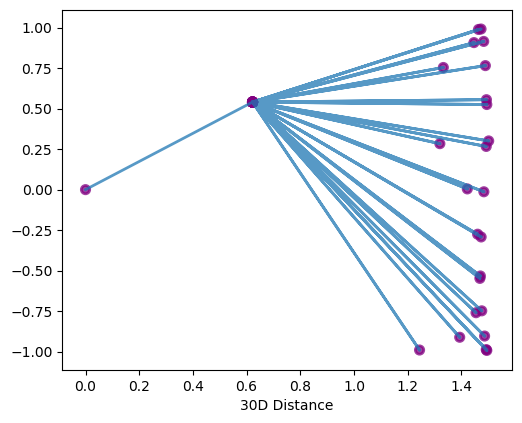

In [33]:
element = 'o'
embfilepath = '../../../data/pca-tsne/pca%s.csv' %(element) 
labelfilepath = '../../../data/pca-tsne/labelO.csv'


emb = np.genfromtxt(embfilepath,delimiter=',')
label = pd.read_csv(labelfilepath,delimiter=',')

# -2 the label file
# -1 the pca file
value = 24


distance_networks(emb,label,value)
